<H2>Performance Metrics and Model Evaluation</H2>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=2)
 
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

classifier = LinearSVC().fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print('accuracy: ', classifier.score(X_test, y_test))

accuracy:  0.957871396896


We want to know where the classifier made some mistakes, in order to do so, we can use the confusion matrix that will show for each true class, how frequent a given predicted outcome is.


In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  1,  0,  1,  0],
       [ 0,  1, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 43,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 44]])

Here, we can see that 6 '8' were taken for '2'

It is easier to see it with a plot :

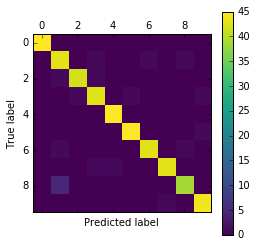

In [3]:
plt.matshow(confusion_matrix(y_test, y_test_pred), cmap='viridis')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

reminder : 

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * (Precision * recall) / (precision + Recall)

There may be a trade off between the two


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.86      0.93      0.90        46
          2       0.98      0.95      0.97        44
          3       0.93      0.93      0.93        46
          4       0.98      1.00      0.99        45
          5       0.98      0.98      0.98        46
          6       0.98      0.96      0.97        45
          7       0.98      0.96      0.97        45
          8       0.95      0.89      0.92        44
          9       0.96      0.98      0.97        45

avg / total       0.96      0.96      0.96       451



In [6]:
np.bincount(y) / y.shape[0]

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

Now let's try to classify digit 3 against all other digits


In [7]:
X, y = digits.data, digits.target == 3

Reminder : bincount counts the number of false and true, return a list : elt1 = #False, elt2 = #True

In [45]:
A = np.array([1, 2, 1, 3, 1])
B = A == 1
print('B:', B)
print(np.bincount(B))


B: [ True False  True False  True]
[2 3]


In [48]:
np.bincount(y) # the result means that there is 183 values 3 in y
np.bincount(y) / y.shape[0] # proportion of 3 in the whole target y values

array([ 0.9,  0.1])

Now our dataset is very imbalanced


In [51]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC

print(cross_val_score(SVC(), X, y))

[ 0.9  0.9  0.9]


array([ 0.9,  0.9,  0.9])

The performance is 90%.... is it good or not, knowing that our dataset is umbalanced (9/1) ? 
We can't conclude because even the dummy classifier that always predicts the most frequent class get the same score

In [52]:
from sklearn.dummy import DummyClassifier
cross_val_score(DummyClassifier("most_frequent"), X, y)

array([ 0.9,  0.9,  0.9])

Accuracy is not a good way to Evaluate classifiers when working on imbalanced datasets


<H4>ROC Curves</H4> are a better measure (ROC : Receiver Operating Characteristics)

Note: auc is the area under the curve (integral)


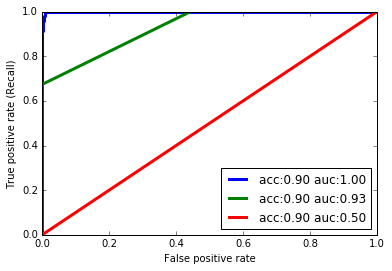

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for gamma in [.01, .05, 1]:
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate (Recall)')
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label='acc:%.2f auc:%.2f' % (acc, auc), linewidth=3)
plt.legend(loc='best')

A diagonal represent the performance of a chance classifier (you hardly can't do worst) while the performance target is in the top left corner. That means to give a higher value to true positive than any negative sample.



In [59]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(SVC(), X, y, scoring="roc_auc"))
#there are manu other, among them, we can find the F1 score
#print(cross_val_score(SVC(), X, y, scoring="f1"))


[ 1.  1.  1.]


C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.  0.  0.]


C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


We can even implement our own scoring metric, instead of the string we can provide a callable


In [60]:
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

cross_val_score(SVC(), X, y, scoring=my_accuracy_scoring)

array([ 0.9,  0.9,  0.9])

We trained a linear model and want to penalize having non-zero coefficient in our model selection :

In [7]:
def my_super_scoring(est, X, y):
    return np.mean(est.predict(X) == y) - np.mean(est.coef_ != 0)

In [9]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC

y = digits.target
grid = GridSearchCV(LinearSVC(C=.01, dual = False), param_grid={'penalty' : ['l1', 'l2']}, scoring = my_super_scoring)
grid.fit(X,y)
print(grid.best_params_)

{'penalty': 'l1'}


multi-class accuracy :

In [10]:
y_true = np.array([0,0,0,1,1,1,1,1,2,2])
y_pred = np.array([0,1,1,0,1,1,2,2,2,2])

confusion_matrix(y_true, y_pred)

array([[1, 2, 0],
       [1, 2, 2],
       [0, 0, 2]])